# Compilation of linear optical circuits via ZX

We show how to map qubit circuits to post-selected linear optical circuits via the ZX calculus.

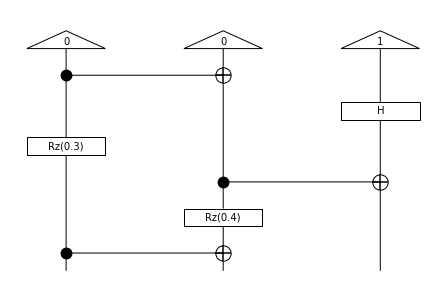

In [1]:
from discopy.quantum import CX, H, Id, Rz, Rx, CZ, Ket, Bra

circuit = Ket(0, 0, 1) >> CX @ H >> Rz(0.3) @ CX >> Id(1) @ Rz(0.4) @ Id(1) >> CX @ Id(1)
circuit.draw()

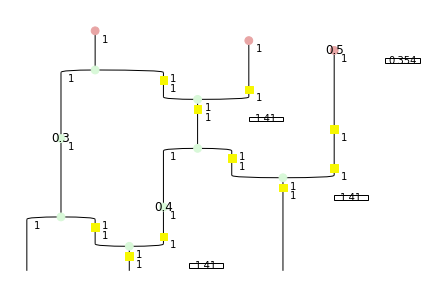

In [2]:
from discopy.quantum.zx import circuit2zx, decomp

diagram = decomp(circuit2zx(circuit))
diagram.draw()

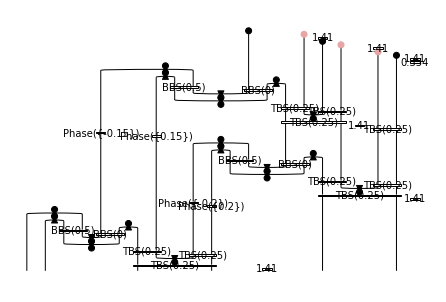

In [3]:
from discopy.quantum.optics import zx2path

circ = zx2path(diagram)
circ.draw(draw_type_labels=False)

In [4]:
def dual_rail_states(n_qubits):
    strings = []
    def genbin(n, bs=[]):
        if len(bs) == 2*n:
            strings.append(bs)
        else:
            genbin(n, bs + [1, 0])
            genbin(n, bs + [0, 1])
    genbin(n_qubits)
    return strings

dual_rail_states(2)

[[1, 0, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1]]

Compute amplitudes of the post-selected photonic circuit

In [5]:
from discopy.quantum.optics import evaluate, qpath_drag, to_matrix
import numpy as np

states = dual_rail_states(len(circuit.cod))
array = np.array([evaluate(circ, [], y) for y in states])

Check that the compiled photonic circuit has the same semantics as the qubit circuit we started with.

In [6]:
assert np.allclose(array.flatten(), circuit.eval().array.flatten())

Extract unitary photonic circuit and get metrics

In [7]:
from discopy.quantum.optics import qpath_drag, make_square, Id, annil, create

bot, top, mid, scalar = qpath_drag(make_square(circ))
n_modes, n_photons = len(mid.dom), bot.boxes.count(create)
print('Number of modes: {}'.format(n_modes))
print('Number of input photons: {}'.format(n_photons))
print('Number of post-selected photons: {}'.format(top.boxes.count(annil)))
print('Normalisation scalar: {:.3f}'.format(scalar))
print('Probability of success: {}'.format((1 / scalar) ** 2))

Number of modes: 24
Number of input photons: 12
Number of post-selected photons: 9
Normalisation scalar: 1448.155
Probability of success: 4.768371582031248e-07


In [8]:
assert np.allclose((mid >> mid.dagger()).array, Id(len(mid.dom)).array)